# Weeks 8 and 9: Data Exploration with Python

(Review Reading Assignments: Analyzing Tabular Omics Data using Pandas DataFrames, and Data Visualization/Data Visualization with Seaborn)

## Check package versions

In [1]:
import sys
!{sys.executable} -m pip install seaborn==0.13.2

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse


In [2]:
!{sys.executable} -m pip install matplotlib==3.7.5

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse


In [3]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns


Bad key text.latex.preview in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

## 1. Explore [this dataset on infectious diseases from the CA Dept. of Public Health](https://catalog.data.gov/dataset/infectious-diseases-by-disease-county-year-and-sex-d8912).

In [4]:
# Save the web address (url) in a python string
dataset_url = 'https://data.chhs.ca.gov/dataset/03e61434-7db8-4a53-a3e2-1d4d36d6848d/resource/75019f89-b349-4d5e-825d-8b5960fc028c/download/odp_idb_2001_2022_ddg_compliant.csv'

# Set the name of the file where we want to save the data
data_file_name = 'ca_id.csv'

# Download the data
urlretrieve(dataset_url, data_file_name)

('ca_id.csv', <http.client.HTTPMessage at 0x7fef418c4fd0>)

In [58]:
# Load the text version of the table (a csv file) into python using pandas
feature_table = pd.read_csv(data_file_name)

In [59]:
feature_table.shape

(189921, 9)

In [60]:
feature_table.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,-,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,-,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,-,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,-,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,-,0.0,0.512


## 2. Select a disease of your choice. Plot the number of cases of that disease by county, for the year 2022.

In [8]:
%matplotlib inline
# Apply the theme
sns.set_context("notebook", font_scale=1.0)

In [9]:
print(pd.__version__)
print(sns.__version__)

1.3.4
0.13.2


In [61]:
disease_2022 = feature_table.loc[(feature_table['Disease'] == 'Leprosy') &
                  (feature_table['Year'] == 2022)]

In [62]:
disease_2022.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
87501,Leprosy,Alameda,2022,Female,0.0,856569,-,0.0,0.431
87502,Leprosy,Alameda,2022,Male,0.0,832969,-,0.0,0.443
87503,Leprosy,Alameda,2022,Total,0.0,1638979,-,0.0,0.225
87567,Leprosy,Alpine,2022,Female,0.0,576,-,0.0,638.384
87568,Leprosy,Alpine,2022,Male,0.0,563,-,0.0,653.077


Text(0.5, 1.0, 'Leprosy in California Counties, 2022')

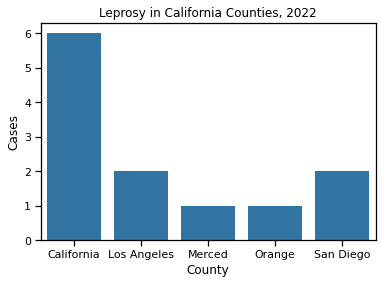

In [63]:
sns.barplot(data=disease_2022.loc[disease_2022['Cases'] > 0], x='County', y='Cases').set_title('Leprosy in California Counties, 2022')

## 3. Select a disease of your choice. Plot the number of cases of that disease in Los Angeles between the years 2001-2010.

In [64]:
disease_la = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                  (feature_table['County'] == 'Los Angeles')]

Text(0.5, 1.0, 'Shigellosis in Los Angeles, 2001-2022')

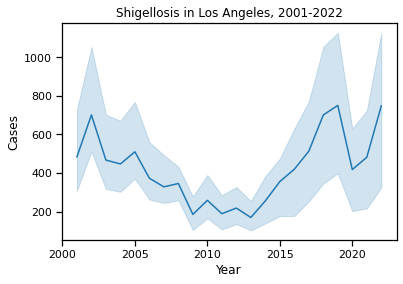

In [65]:
sns.lineplot(data=disease_la, x='Year', y='Cases').set_title('Shigellosis in Los Angeles, 2001-2022')

## 4. Create another plot of your choice, with an appropriate title.

In [109]:
shigellosis = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                             ((feature_table['County'] == 'San Francisco') |
                              (feature_table['County'] == 'Los Angeles') |
                              (feature_table['County'] == 'Sacramento'))].copy()

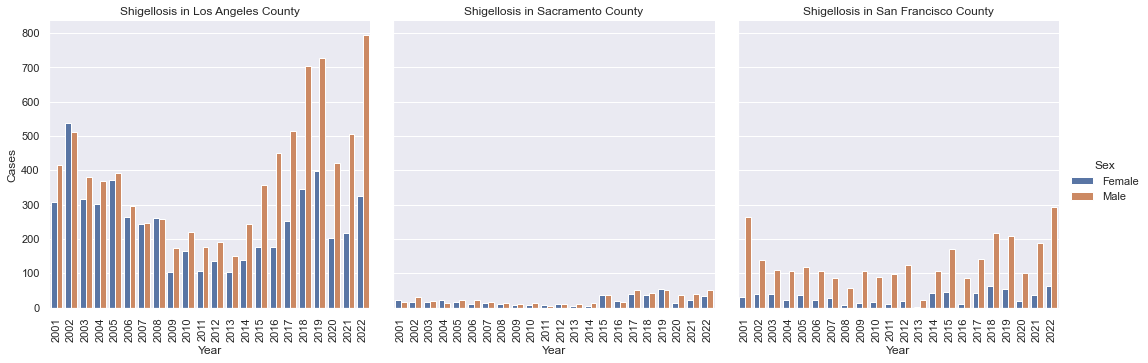

In [110]:
#fig = sns.barplot(data=shigellosis.loc[shigellosis['Sex'] == 'Total'], x='Year', y='Cases', hue='County')
ax = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases', hue='Sex', col='County')

# Rotate labels
#fig.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', rotation=90)

# Set title
#fig.set_title('Shigellosis in three CA counties')
ax.set_titles("Shigellosis in {col_name} {col_var}")

# Reposition legend
#sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

# Week 10: Discussion
## Does shigellosis really occur more often in LA than in other counties?

In [111]:
shigellosis['Cases_per_100kPopulation'] = 100000 * shigellosis['Cases'] / shigellosis['Population']

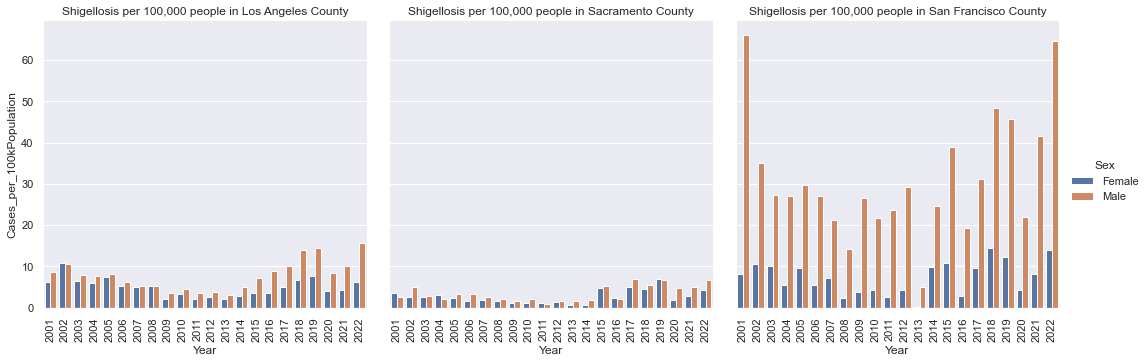

In [112]:
#fig2 = sns.barplot(data=shigellosis.loc[shigellosis['Sex'] == 'Total'], x='Year', y='Cases_per_100kPopulation', hue='County')
ax2 = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases_per_100kPopulation', hue='Sex', col='County')

# Rotate labels
#fig2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

# Set title
#fig2.set_title("Shigellosis per 100,000 people in three CA counties")
ax2.set_titles("Shigellosis per 100,000 people in {col_name} {col_var}")

# Reposition legend
#sns.move_legend(fig2, "upper left", bbox_to_anchor=(1, 1))

## How does San Francisco County's rate of shigellosis compare to other counties in CA?

Here's a little introduction to [Z-scores](https://statsthinking21.github.io/statsthinking21-core-site/fitting-models.html#z-scores).

> Intuitively, you can think of a Z-score as telling you how far away any data point is from the mean, in units of standard deviation. 

In [101]:
shigellosis_all_counties = feature_table.loc[feature_table['Disease'] == 'Shigellosis'].copy()
shigellosis_all_counties['Cases_per_100kPopulation'] = 100000 * shigellosis_all_counties['Cases'] / shigellosis_all_counties['Population']
shigellosis_all_counties['Z-scored_Rate'] = (shigellosis_all_counties['Cases_per_100kPopulation'] - shigellosis_all_counties['Cases_per_100kPopulation'].mean()) / shigellosis_all_counties['Cases_per_100kPopulation'].std()

## In one year (2022)?

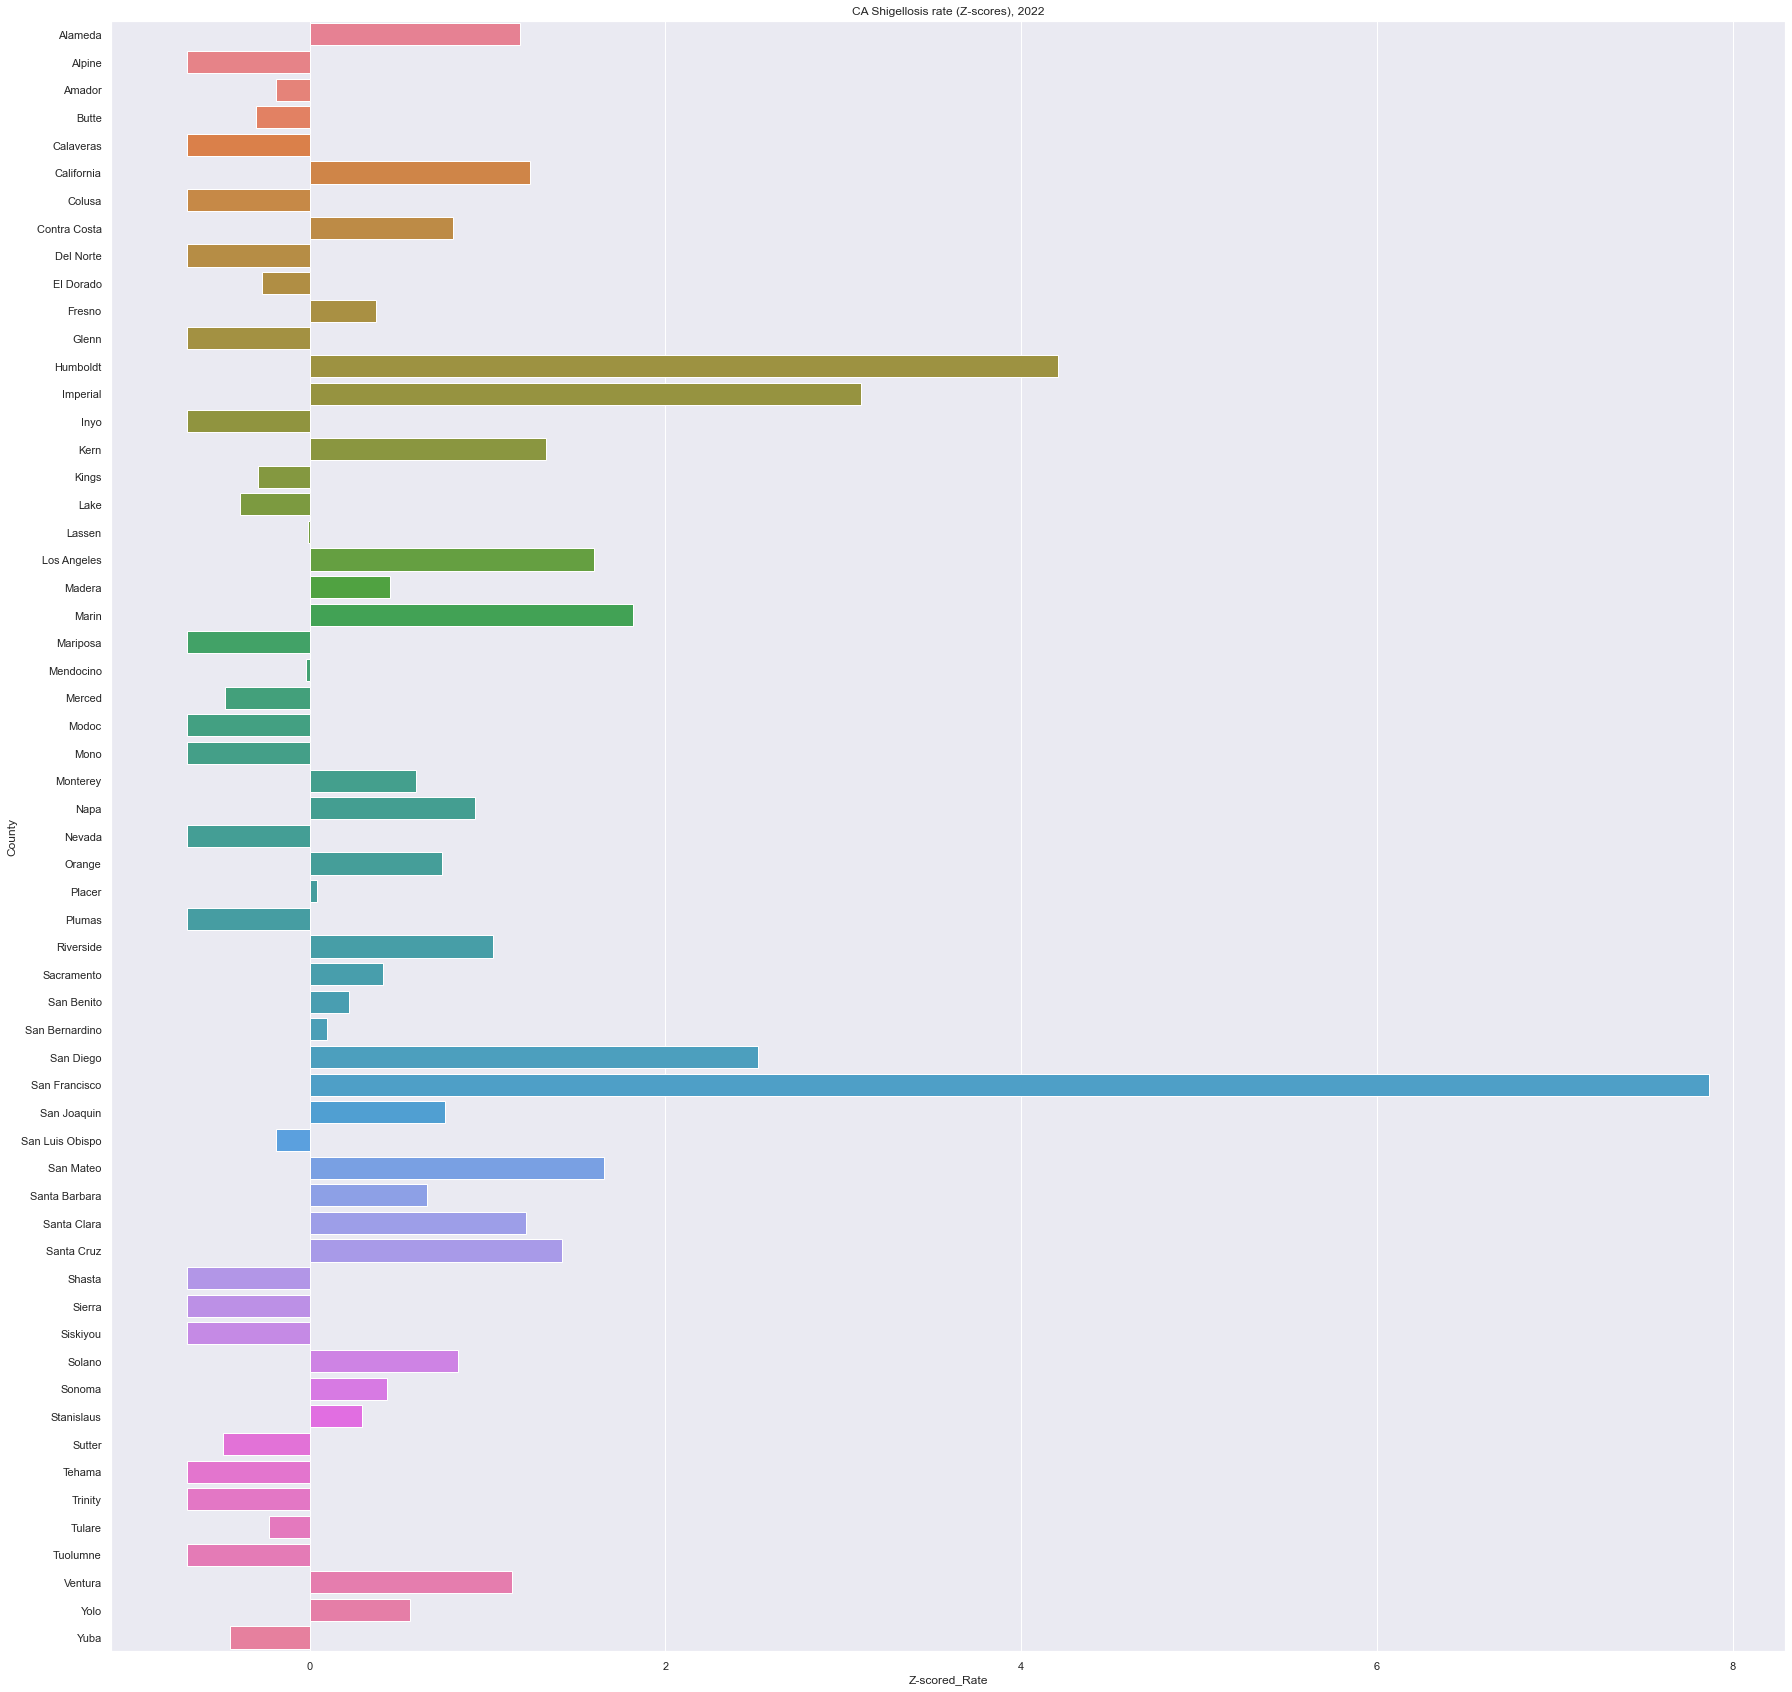

In [103]:
fig3 = sns.barplot(data=shigellosis_all_counties.loc[(shigellosis_all_counties['Sex'] == 'Total') & 
                                                     (shigellosis_all_counties['Year'] == 2022)], 
                   y='County', x='Z-scored_Rate', hue='County')

# Set title
fig3.set_title("CA Shigellosis rate (Z-scores), 2022")

sns.set(rc={"figure.figsize": (30, 30)})

## In all years?

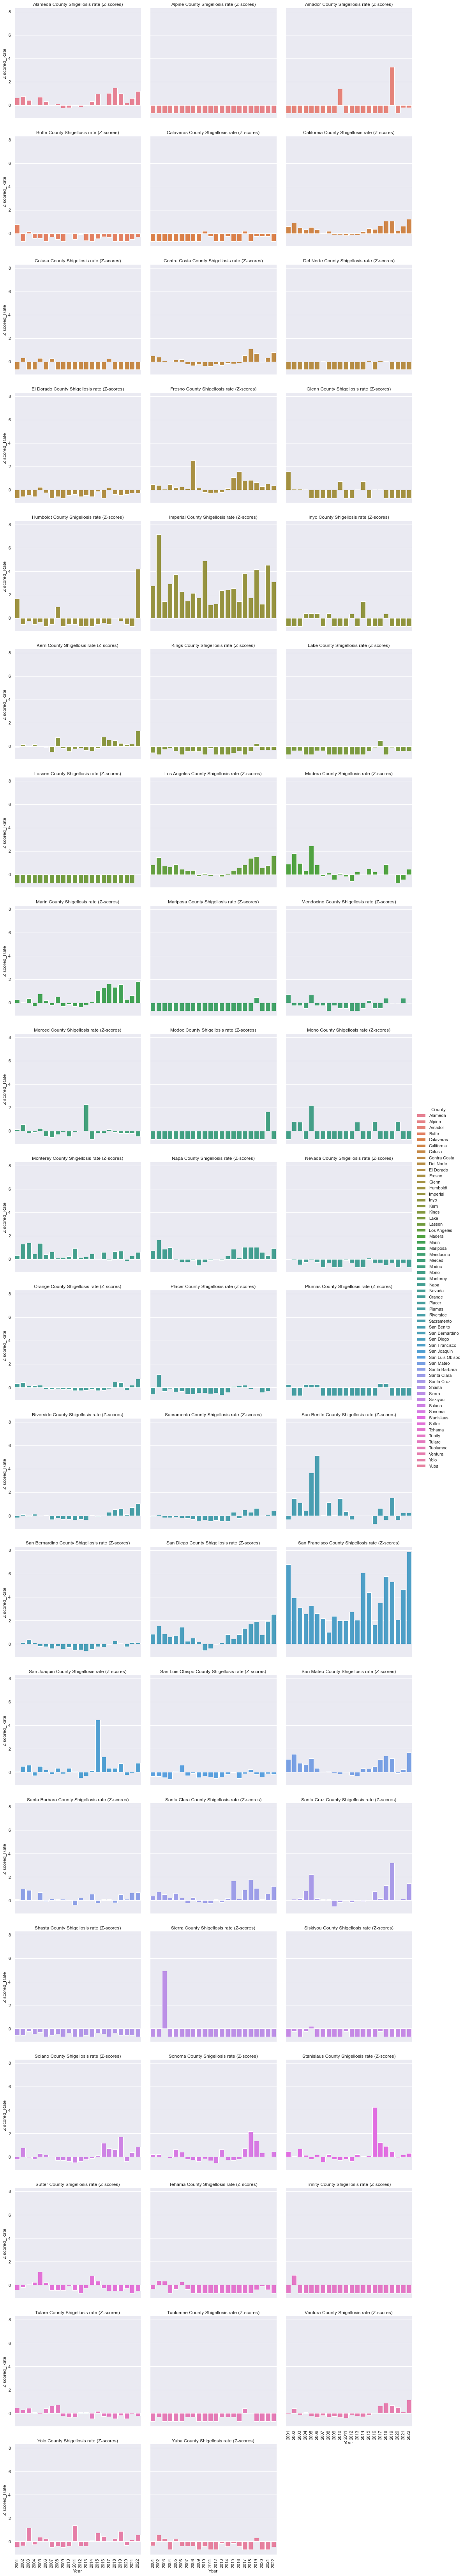

In [108]:
ax4 = sns.catplot(kind='bar', data=shigellosis_all_counties.loc[(shigellosis_all_counties['Sex'] == 'Total')], 
                  x='Year', y='Z-scored_Rate', hue='County', col='County', col_wrap=3)

# Rotate labels
ax4.tick_params(axis='x', rotation=90)

# Set title
ax4.set_titles("{col_name} {col_var} Shigellosis rate (Z-scores)")

# Reapply the theme
sns.set_context("notebook", font_scale=1.0)